In [24]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# URL 통해서 캐글의 자전거 대여 수요 데이터셋 다운로드
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)

In [25]:
# 독립변수 데이터 생성
# temp, atemp, humidity, windspeed	컬럼 데이터만 저장
X_df_bike = df_bike.iloc[:, 5:9]
# print(X_df_bike.head(5))

# 종속변수 데이터를 위한 파생변수 생성
# 총 대여건수(count) 가 500 이상인 경우 1, 미만인 경우 0
df_bike['y'] = 1
df_bike.loc[df_bike['count'] < 500, 'y'] = 0
y = df_bike['y'] 


In [26]:
# StandardScaler 이용한 스케일링
scaler = StandardScaler()
scaler.fit(X_df_bike)
result = scaler.transform(X_df_bike)

# 스케일된 결과 데이터를 DataFrame 으로 저장
X_scaled_bike = pd.DataFrame(data=result, 
                             columns=X_df_bike.columns)


In [27]:
# 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(X_scaled_bike, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

In [28]:
# LogisticRegression 모델 객체 생성
clf = LogisticRegression()

# 훈련 데이터를 통한 학습
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# roc_curve() 메소드 로딩
from sklearn.metrics import roc_curve

In [30]:
# 학습된 모델에서 클래스 별 확률 예측값 생성
predict_prob = clf.predict_proba(x_test)
print('Predicted class probability(1st Data)', np.round(predict_prob[0], 3))
print('Target data index(1st Data)', y_test.values[0])

Predicted class probability(1st Data) [0.887 0.113]
Target data index(1st Data) 0


In [31]:
# roc_curve 메소드를 통한 FPR, TPR 계산 값과 이를 위한 Threshold 값 생성
fprs , tprs , thresholds = roc_curve(y_test,predict_prob[:,1])

# FPR, TPR 계산 값 Threshold 값을 10건 만 샘플링
thr_index = np.arange(0, thresholds.shape[0], 110)
print(thresholds.shape)
print('Sample Threshold Index(n=10):', thr_index)
print('Sample Threshold Value(n=10): ', np.round(thresholds[thr_index], 2))
print('Sample Threshold FPR(n=10): ', np.round(fprs[thr_index], 3))
print('Sample Threshold TPR(n=10): ', np.round(tprs[thr_index], 3))

(1178,)
Sample Threshold Index(n=10): [   0  110  220  330  440  550  660  770  880  990 1100]
Sample Threshold Value(n=10):  [1.48 0.18 0.14 0.1  0.08 0.06 0.05 0.04 0.03 0.02 0.02]
Sample Threshold FPR(n=10):  [0.    0.056 0.114 0.192 0.281 0.387 0.487 0.593 0.699 0.802 0.922]
Sample Threshold TPR(n=10):  [0.    0.258 0.48  0.625 0.702 0.786 0.847 0.887 0.944 0.984 0.992]


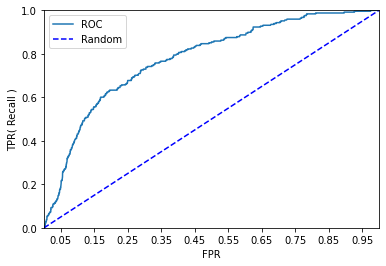

Testing Data AUC: 0.777


In [32]:
# ROC Curve를 그리기 위한 함수
def roc_curve_plot(y_test , pred_proba_c1):
    import matplotlib.pyplot as plt
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'b--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

 # roc_curve_plot 함수를 이용하여 ROC Curve 생성
roc_curve_plot(y_test,clf.predict_proba(x_test)[:,1])

# roc_auc_score() 메소드 로딩
from sklearn.metrics import roc_auc_score

# roc_auc_score() 메소드를 통한 AUC 측정
roc_score = roc_auc_score(y_test.values,predict_prob[:,1])
print('Testing Data AUC: {:0.3f}'.format(roc_score))